In [1]:
## Amazon case study

In [2]:
import nltk

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
reviews = pd.read_csv("K8 Reviews v0.2.csv")
reviews.head()

sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...
3          1                                               Good
4          0  The worst phone everThey have changed the last...

In [5]:
reviews.shape

(14675, 2)

In [6]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

- If the rating given by the customer is 1,2,3 => sentiment is 0
- If the rating given by the customer 4 and 5 => sentiment is 1

In [7]:
from wordcloud import WordCloud

In [8]:
reviews_combined = " ".join(reviews.review.values)

In [9]:
#reviews_combined

In [10]:
str = ["hi","hello","how are you"]
" ".join(str)

'hi hello how are you'

In [11]:
reviews_combined[:100]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hel'

In [12]:
reviews_combined[:101]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell'

In [13]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [14]:
word_cloud = WordCloud(width = 800,height= 800, max_words=150).generate(reviews_combined).generate_from_text(reviews_combined)

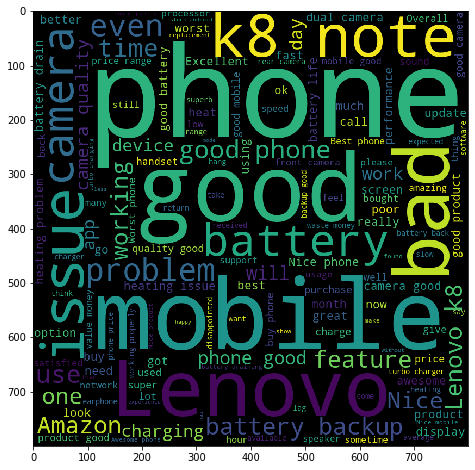

In [15]:
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.show()

### Getting frequency count

In [16]:
lst = []
for i in reviews.review:
    lst.extend(i.split(" "))

In [17]:
#lst

In [18]:
wordfreq = {}                         ## Creating frequency counts of the words
for w in lst:
    wordfreq[w] = wordfreq.get(w,0)+1


In [19]:
#wordfreq


In [20]:
#wordfreq.items()  # it will give list of tuple of the frequency count of the words

In [21]:
#wordfreq.keys()

In [22]:
#wordfreq.values()

### creating dataframe

In [23]:
df = pd.DataFrame(list(wordfreq.items()),columns=['word','freq'])
df

word  freq
0          Good  1315
1           but  2222
2          need   196
3       updates    98
4           and  5078
...         ...   ...
30315  prosecer     1
30316    whater     1
30317   Gaget..     1
30318       mod     1
30319  pakeging     1

[30320 rows x 2 columns]

In [24]:
### Ploting bar graph of the frequency count of top 25 words

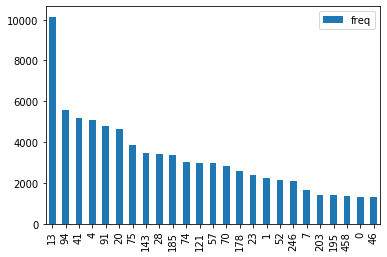

In [25]:
plt.figure(figsize=(15,8))
%matplotlib inline
df1 = df.sort_values(ascending=False,by='freq').head(25)
df1.plot(kind='bar')

In [26]:
### Ploting bar graph of the frequency count of top 25 words

In [27]:
import seaborn as sns

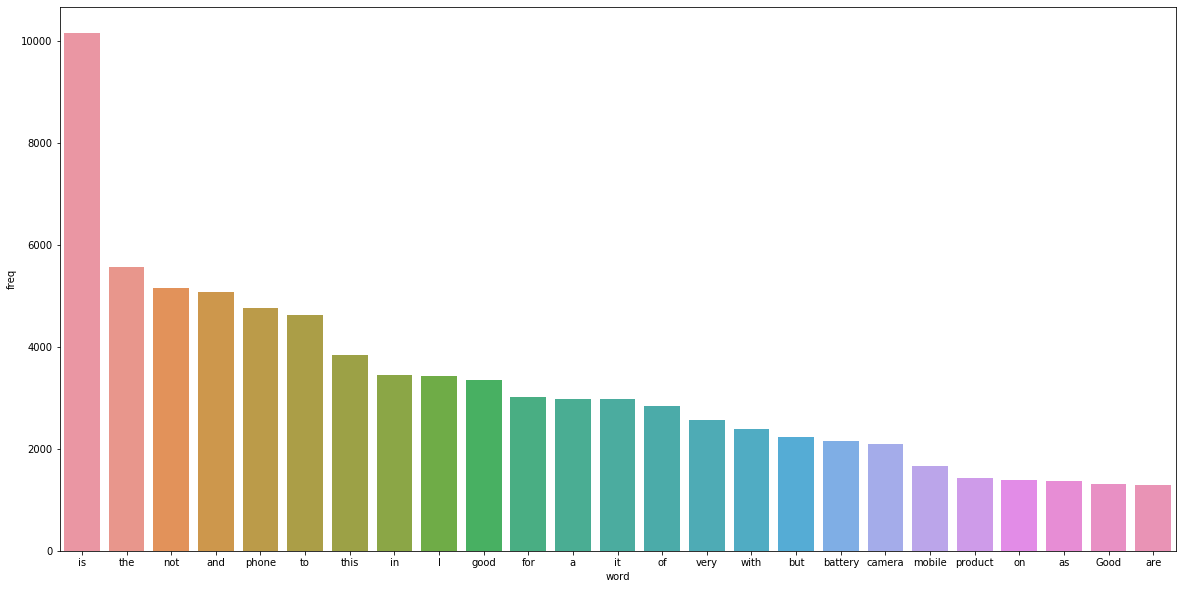

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x=df1.word, y= df1.freq)


### Using Cleaning techniques

- Problems with the above values
    - 1. case is non uniform
    - 2. punctuations and stop words
    - 3. words with diffrent tense forms like charged, charging, charges has its root from in charge

In [29]:
from nltk.tokenize import word_tokenize

In [30]:
all_items = word_tokenize(reviews_combined.lower())
#all_items

In [31]:
print(all_items[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [32]:
###ploting frequency graph directly using nltk

from nltk.probability import FreqDist

In [33]:
fdist = FreqDist(all_items)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

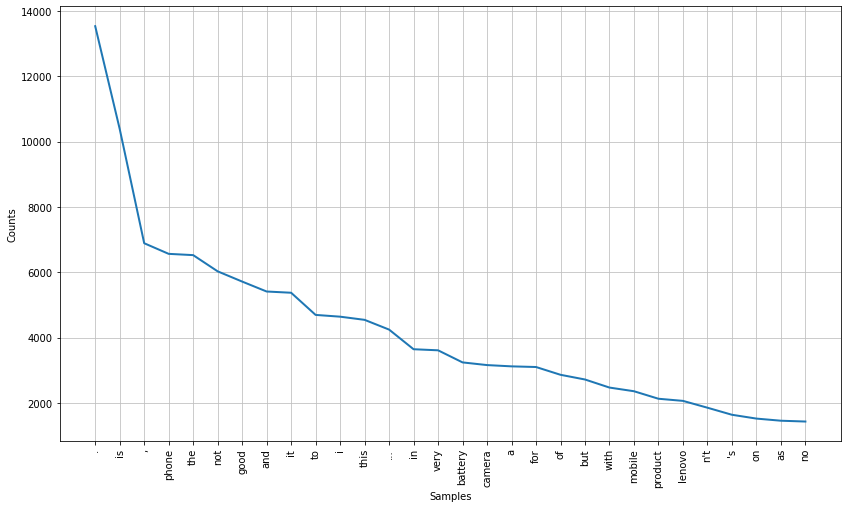

In [34]:
plt.figure(figsize=(14,8))
fdist.plot(30,cumulative=False)
plt.show()



###### : Note here in the curve the words in starting and last of the curve is not as usefull

- The most commonly used and the commonly used words in any language includes:
    - language connectors called stop words
    - punctuations

### Removing stopwords(most commonly used words) and punctuation

In [35]:
from string import punctuation
from nltk.corpus import stopwords

In [36]:
stop_nltk = stopwords.words("english")

In [37]:
stop_updated = stop_nltk + ['...','..','||'] + ["phone",'mobile','lenovo','k8','note','amazon',"n't"] 

In [38]:
reviews_updated1 = [term for term in all_items if term not in stop_updated and term not in list(punctuation) \
                   and len(term)>2]

In [39]:
print(reviews_updated1)

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january..', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'returning', '.highly', 'disappointing', 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot..really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', 'buy', 'thing', 'better', 'options', 'wrost', 'good', '

In [40]:
len(reviews_updated1)

157325

### Lemmatization and Stemming

In [41]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [42]:
stemmer_p = PorterStemmer()

In [43]:
%%time
ls_stem=[]
for i in reviews_updated1:
    ls_stem.append(stemmer_p.stem(i))
len(set(ls_stem))

Wall time: 6.65 s


16245

In [44]:
%%time
ls_snow=[]
stemmer_s = SnowballStemmer("english")
len(set([stemmer_s.stem(word) for word in reviews_updated1]))

Wall time: 4.32 s


16161

### Conculsion
    - 1. stemmer helps to reduce the number of distinct words in the corpus
    - 2. Lemmetizer helps to retain the meaning of the words effectively used when the context of the word is important
    - 3. Stemmer is used when I have an intent of getting lesser words which inturn reduces the total number of features

In [45]:
# Combine all the steps and create a udf
# takes one review as input and returns a cleaned review as a string

def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens
              if term not in stop_updated and 
              term not in list(punctuation) and len(term) > 2]
    res = " ".join(stemmed)
    return res

In [46]:
### Adding a column name Clean_review into our original dataframe

In [47]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [48]:
reviews

sentiment                                             review  \
0              1             Good but need updates and improvements   
1              0  Worst mobile i have bought ever, Battery is dr...   
2              1  when I will get my 10% cash back.... its alrea...   
3              1                                               Good   
4              0  The worst phone everThey have changed the last...   
...          ...                                                ...   
14670          1  I really like the phone, Everything is working...   
14671          1  The Lenovo K8 Note is awesome. It takes best p...   
14672          1                       Awesome Gaget.. @ this price   
14673          1  This phone is nice processing will be successf...   
14674          1      Good product but the pakeging was not enough.   

                                            clean_review  
0                                 good need updat improv  
1      worst bought ever batteri drain like hell back...  
2                        get cash back alreadi january..  
3                                                   good  
4      worst everthey chang last problem still return...  
...                                                  ...  
14670           realli like everyth work fine whater use  
14671  awesom take best pictur dual camera slim metal...  
14672                               awesom gaget.. price  
14673  nice process success dual camera success dual mod  
14674                          good product pakeg enough  

[14675 rows x 3 columns]

In [49]:
new_reviews_combined = " ".join(reviews.clean_review.values)
new_reviews_combined ### changing the clean text to a signle string

"good need updat improv worst bought ever batteri drain like hell backup hour internet use even put idl get discharged.thi biggest lie lenov expect make full say batteri 4000mah booster charger fake take least hour fulli charged.do know surviv make full us.pleas els regret like get cash back alreadi january.. good worst everthey chang last problem still return .high disappoint tell buyi total disappointedpoor batterypoor camerawast money awesom charg heat allot..r genuin reason hate batteri level worn hit problem hang problem servic station ahmedabad one year warranti chang lot glitch dont buy thing better option wrost good charger work damag within month purchas item much heat batteri life poor face batteri problem motherboard problem month worst life good slim good battri backup good screen love headset avail everi time automat kind suggest best product accord prize rang specif comparison anoth rang bought seal paid 10,999 also hdpf credit card paid 9998.. best deal ever done amazon.

In [50]:
all_items

['good',
 'but',
 'need',
 'updates',
 'and',
 'improvements',
 'worst',
 'mobile',
 'i',
 'have',
 'bought',
 'ever',
 ',',
 'battery',
 'is',
 'draining',
 'like',
 'hell',
 ',',
 'backup',
 'is',
 'only',
 '6',
 'to',
 '7',
 'hours',
 'with',
 'internet',
 'uses',
 ',',
 'even',
 'if',
 'i',
 'put',
 'mobile',
 'idle',
 'its',
 'getting',
 'discharged.this',
 'is',
 'biggest',
 'lie',
 'from',
 'amazon',
 '&',
 'lenove',
 'which',
 'is',
 'not',
 'at',
 'all',
 'expected',
 ',',
 'they',
 'are',
 'making',
 'full',
 'by',
 'saying',
 'that',
 'battery',
 'is',
 '4000mah',
 '&',
 'booster',
 'charger',
 'is',
 'fake',
 ',',
 'it',
 'takes',
 'at',
 'least',
 '4',
 'to',
 '5',
 'hours',
 'to',
 'be',
 'fully',
 'charged.do',
 "n't",
 'know',
 'how',
 'lenovo',
 'will',
 'survive',
 'by',
 'making',
 'full',
 'of',
 'us.please',
 'don',
 ';',
 't',
 'go',
 'for',
 'this',
 'else',
 'you',
 'will',
 'regret',
 'like',
 'me',
 '.',
 'when',
 'i',
 'will',
 'get',
 'my',
 '10',
 '%',
 'ca

In [51]:
fdist = FreqDist(all_items)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

### Q. 10

In [52]:
from string import punctuation
from nltk.corpus import stopwords

In [53]:
stop_nltk = stopwords.words("english")

In [54]:
stop_updated1 = stop_nltk + ['...','..','||'] + ["phone",'mobile','lenovo','k8','note','amazon',"n't"]
stop_updated1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
## Removing "no", "not","nor"

In [56]:
for i in stop_updated1:
    if ((i == "no")|(i=='not')|(i=='nor')):
        stop_updated1.remove(i)

In [57]:
len(stop_updated1)

187

In [58]:
len(stop_nltk)

179

## Q 11.

In [59]:
reviews_combined

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don\'t know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me. when I will get my 10% cash back.... its already 15 January.. Good The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon Only I\'m telling don\'t buyI\'m totally disappointedPoor batteryPoor cameraWaste of money Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note The battery level has worn down It\'s over hitting problems...an

In [60]:
doc = pd.DataFrame([new_reviews_combined],columns=['text'])
doc

text
0  good need updat improv worst bought ever batte...

### Creating ngrams

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
## Creating Bi-grams

In [63]:
count_vectorizer_bg = CountVectorizer(ngram_range=(2, 2))
count_vectorizer_bg

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(2, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [64]:
X_bg = count_vectorizer_bg.fit_transform(doc['text'])### Apllying bigram on the dataframe
X_bg

<1x87851 sparse matrix of type '<class 'numpy.int64'>'
	with 87851 stored elements in Compressed Sparse Row format>

### Creating Document term matrixof the bigrams

In [65]:
DTM_bg = pd.DataFrame(X_bg.toarray(),columns=count_vectorizer_bg.get_feature_names())
DTM_bg

00 00  00 box  00 hour  00 realli  00 silent  00 usual  000 000  \
0      1       1        1          1          1         1        1   

   000 camera  000 charger  000 discount  ...  இல பலம  என இயல  ஏற லல  ஒன என  \
0           1            1             1  ...       1       1      1      1   

   கவ ஆடம  பரம இல  பலம ரண  ரண _smart  றப ஒன  லல becaus  
0       1       1       1          1      1          1  

[1 rows x 87851 columns]

In [66]:
DTM_bg.sum().sort_values(ascending=False).head(30)

batteri backup    593
batteri drain     490
camera qualiti    473
good product      406
heat issu         397
camera good       391
heat problem      340
good batteri      336
dual camera       298
drain fast        278
good good         277
batteri life      272
good camera       270
product good      255
work proper       234
qualiti good      231
get heat          225
valu money        210
wast money        190
front camera      189
call record       183
price rang        182
turbo charger     182
batteri back      177
turbo charg       176
also good         175
rear camera       168
buy product       161
nice product      155
perform good      146
dtype: int64

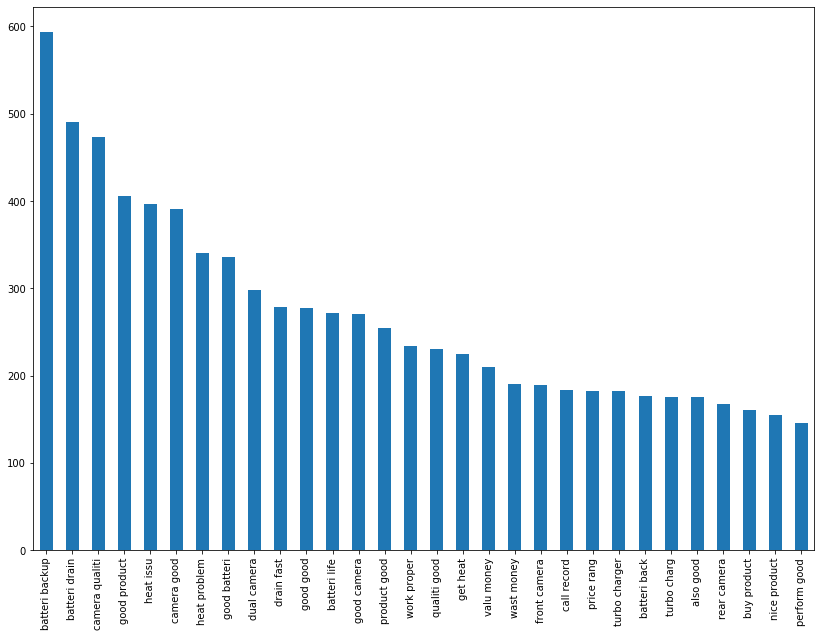

In [67]:
plt.figure(figsize=(14,10))
DTM_bg.sum().sort_values(ascending=False).head(30).plot(kind='bar') #taking top 30 words

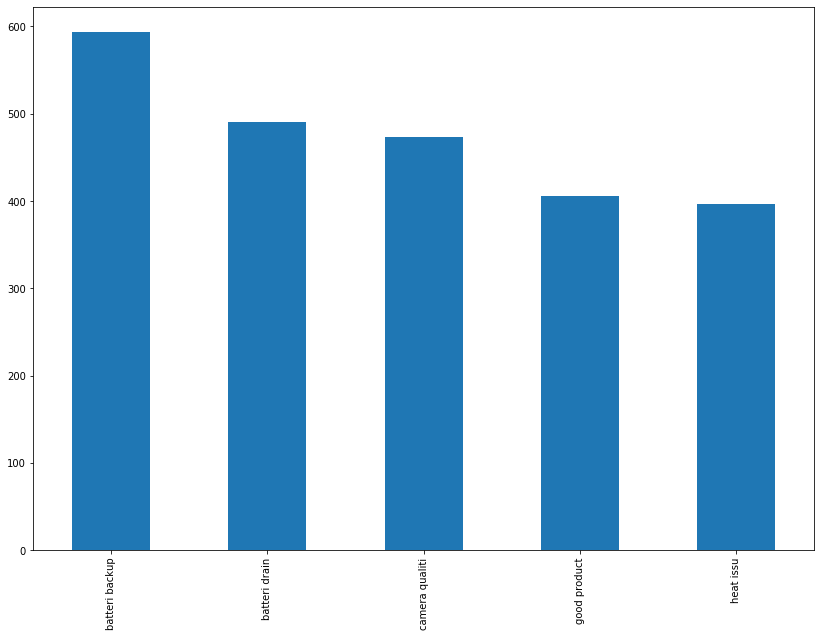

In [68]:
plt.figure(figsize=(14,10))
DTM_bg.sum().sort_values(ascending=False).head(5).plot(kind='bar')   #taking top 5 words

### Applying AFINN score

In [69]:
reviews

sentiment                                             review  \
0              1             Good but need updates and improvements   
1              0  Worst mobile i have bought ever, Battery is dr...   
2              1  when I will get my 10% cash back.... its alrea...   
3              1                                               Good   
4              0  The worst phone everThey have changed the last...   
...          ...                                                ...   
14670          1  I really like the phone, Everything is working...   
14671          1  The Lenovo K8 Note is awesome. It takes best p...   
14672          1                       Awesome Gaget.. @ this price   
14673          1  This phone is nice processing will be successf...   
14674          1      Good product but the pakeging was not enough.   

                                            clean_review  
0                                 good need updat improv  
1      worst bought ever batteri drain like hell back...  
2                        get cash back alreadi january..  
3                                                   good  
4      worst everthey chang last problem still return...  
...                                                  ...  
14670           realli like everyth work fine whater use  
14671  awesom take best pictur dual camera slim metal...  
14672                               awesom gaget.. price  
14673  nice process success dual camera success dual mod  
14674                          good product pakeg enough  

[14675 rows x 3 columns]

# Sentiments Analysis:

In [70]:
afinn = pd.read_csv("AFINN-111.txt",sep="\t",header=None)
afinn.head()

0  1
0    abandon -2
1  abandoned -2
2   abandons -2
3   abducted -2
4  abduction -2

In [71]:
afinn.columns = ['Term','Score']
afinn.head()

Term  Score
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [72]:
term_scores = dict(afinn.values)
term_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [73]:
def get_sentiment(sent):
    score = 0
    tokens = word_tokenize(sent.lower())
    for term in tokens:
        score+= term_scores.get(term,0)
    return score

In [74]:
reviews['sent_score']  = reviews['clean_review'].apply(get_sentiment)

In [75]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  
0                             good need updat improv           3  
1  worst bought ever batteri drain like hell back...          -8  
2                    get cash back alreadi january..           0  
3                                               good           3  
4  worst everthey chang last problem still return...          -7

In [76]:
reviews['sent_prediction']  = reviews['sent_score'].apply(lambda x: 1 if x> 0 else 0)

In [77]:
reviews

sentiment                                             review  \
0              1             Good but need updates and improvements   
1              0  Worst mobile i have bought ever, Battery is dr...   
2              1  when I will get my 10% cash back.... its alrea...   
3              1                                               Good   
4              0  The worst phone everThey have changed the last...   
...          ...                                                ...   
14670          1  I really like the phone, Everything is working...   
14671          1  The Lenovo K8 Note is awesome. It takes best p...   
14672          1                       Awesome Gaget.. @ this price   
14673          1  This phone is nice processing will be successf...   
14674          1      Good product but the pakeging was not enough.   

                                            clean_review  sent_score  \
0                                 good need updat improv           3   
1      worst bought ever batteri drain like hell back...          -8   
2                        get cash back alreadi january..           0   
3                                                   good           3   
4      worst everthey chang last problem still return...          -7   
...                                                  ...         ...   
14670           realli like everyth work fine whater use           4   
14671  awesom take best pictur dual camera slim metal...           2   
14672                               awesom gaget.. price           0   
14673  nice process success dual camera success dual mod           7   
14674                          good product pakeg enough           3   

       sent_prediction  
0                    1  
1                    0  
2                    0  
3                    1  
4                    0  
...                ...  
14670                1  
14671                1  
14672                0  
14673                1  
14674                1  

[14675 rows x 5 columns]

In [78]:
### Getting Accuracy Score

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

0.7118228279386712

### Sentiment precdiction Strategy 2: Using popular package - Vader

In [81]:
reviews.head(2)

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   

   sent_prediction  
0                1  
1                0

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [83]:
analyser = SentimentIntensityAnalyzer()

In [84]:
def det_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [85]:
reviews['compund_score'] = reviews['review'].apply(det_vader_sentiment)

In [86]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction  compund_score  
0                1         0.5994  
1                0        -0.8720  
2                0         0.0000  
3                1         0.4404  
4                0        -0.8289

In [87]:
reviews['compound_prediction']  = reviews['compund_score'].apply(lambda x: 1 if x> 0.33 else 0)

In [88]:
reviews.head(2)

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   

   sent_prediction  compund_score  compound_prediction  
0                1         0.5994                    1  
1                0        -0.8720                    0

In [89]:
accuracy_score(reviews.sentiment,reviews.compound_prediction)

0.8002725724020443

### Sentiment precdiction Strategy 2: Building our own model

In [90]:
X = reviews.clean_review ### Indepentent variable
Y = reviews.sentiment    ### Depentent variable

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 42)

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
count_vect = CountVectorizer()

In [94]:
X_train_bow = count_vect.fit_transform(x_train)  ###Note- here we will use .fit_transform()
X_train_bow

<10272x8521 sparse matrix of type '<class 'numpy.int64'>'
	with 101745 stored elements in Compressed Sparse Row format>

In [95]:
X_test_bow = count_vect.transform(x_test)  ### Note- here we will use only .transform() here so to keep the same number of 
                                           ###   features in both x_train, x_test  

X_test_bow

<4403x8521 sparse matrix of type '<class 'numpy.int64'>'
	with 41208 stored elements in Compressed Sparse Row format>

In [96]:
print(X_train_bow.shape,X_test_bow.shape)

(10272, 8521) (4403, 8521)


- Note X_train and X_test should always have same number of features in both of them

## Applying Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

In [98]:
logreg = LogisticRegression()
logreg.fit(X_train_bow,y_train)

C:\Users\SHASHANK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_pred = logreg.predict(X_test_bow)

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Confusion Matrix",confusion_matrix(y_test, y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred)*100)

Confusion Matrix [[1932  379]
 [ 277 1815]]
Accuracy Score:  85.10106745400863


### Applying Naive's Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [102]:
gnb = GaussianNB()
gnb.fit(X_train_bow.toarray(),y_train)                                    # here .fit() which calculate distances

GaussianNB(priors=None, var_smoothing=1e-09)

In [103]:
y_pred1 = logreg.predict(X_test_bow)

In [104]:
print("Confusion Matrix",confusion_matrix(y_test, y_pred1))
print("Accuracy Score: ",accuracy_score(y_test,y_pred1)*100)

Confusion Matrix [[1932  379]
 [ 277 1815]]
Accuracy Score:  85.10106745400863


---

## Applying Clustering 

In [105]:
## Building mode

In [106]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction  compund_score  compound_prediction  
0                1         0.5994                    1  
1                0        -0.8720                    0  
2                0         0.0000                    0  
3                1         0.4404                    1  
4                0        -0.8289                    0

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
#Instantize the count vectorizer

count_vectorizer = CountVectorizer()

In [109]:
#fit---> extracts the features as BOW
# transfrom --> computes the counts for every features extracted

X = count_vectorizer.fit_transform(reviews['clean_review'])
X

<14675x10697 sparse matrix of type '<class 'numpy.int64'>'
	with 145263 stored elements in Compressed Sparse Row format>

In [110]:
count_vectorizer.get_feature_names()

['00',
 '000',
 '000000000',
 '000mah',
 '01',
 '01_04_2018',
 '02',
 '02may',
 '03',
 '04',
 '05',
 '06',
 '08',
 '09',
 '09953756674',
 '0a',
 '0ct2017',
 '0perform',
 '0signal',
 '0too',
 '10',
 '100',
 '1000',
 '10000',
 '1000000',
 '10000000',
 '1000rs',
 '100killer',
 '100min',
 '105',
 '107',
 '10800',
 '1080p',
 '10999',
 '10a',
 '10batteri',
 '10camera',
 '10cor',
 '10core',
 '10day',
 '10design',
 '10game',
 '10gaming',
 '10graphics',
 '10heating',
 '10hour',
 '10hr',
 '10hrs',
 '10k',
 '10min',
 '10mins',
 '10mins2',
 '10mint',
 '10never',
 '10overal',
 '10performence',
 '10plus',
 '10processor',
 '10ram',
 '10sept',
 '10th',
 '11',
 '110',
 '11000',
 '11650',
 '11700',
 '11990',
 '11999',
 '11999bodi',
 '11day',
 '11k',
 '11month',
 '11th',
 '12',
 '120',
 '1200',
 '12000',
 '122',
 '1250',
 '1285932',
 '128gb',
 '12999',
 '12am',
 '12hour',
 '12hrs',
 '12k',
 '12th',
 '13',
 '130',
 '1300',
 '13000',
 '13000rs',
 '13499',
 '13900',
 '13998',
 '13999',
 '13999but',
 '13999f

In [111]:
print(count_vectorizer.vocabulary_)    # gives the postion/index of the word in dtm

{'good': 4241, 'need': 6510, 'updat': 9991, 'improv': 4935, 'worst': 10546, 'bought': 1757, 'ever': 3462, 'batteri': 1435, 'drain': 3177, 'like': 5748, 'hell': 4672, 'backup': 1293, 'hour': 4809, 'internet': 5075, 'use': 10047, 'even': 3457, 'put': 7846, 'idl': 4884, 'get': 4164, 'discharged': 3027, 'thi': 9594, 'biggest': 1620, 'lie': 5710, 'lenov': 5633, 'expect': 3551, 'make': 5961, 'full': 4032, 'say': 8497, '4000mah': 359, 'booster': 1737, 'charger': 2180, 'fake': 3658, 'take': 9445, 'least': 5602, 'fulli': 4036, 'charged': 2173, 'do': 3110, 'know': 5468, 'surviv': 9400, 'us': 10032, 'pleas': 7382, 'els': 3360, 'regret': 8134, 'cash': 2080, 'back': 1279, 'alreadi': 842, 'january': 5237, 'everthey': 3473, 'chang': 2154, 'last': 5570, 'problem': 7597, 'still': 9192, 'return': 8283, 'high': 4711, 'disappoint': 3017, 'tell': 9505, 'buyi': 1918, 'total': 9761, 'disappointedpoor': 3021, 'batterypoor': 1450, 'camerawast': 2019, 'money': 6324, 'awesom': 1241, 'charg': 2164, 'heat': 4615, 

In [112]:
DTM = pd.DataFrame(X.toarray(),columns=count_vectorizer.get_feature_names())
DTM

00  000  000000000  000mah  01  01_04_2018  02  02may  03  04  ...  இல  \
0       0    0          0       0   0           0   0      0   0   0  ...   0   
1       0    0          0       0   0           0   0      0   0   0  ...   0   
2       0    0          0       0   0           0   0      0   0   0  ...   0   
3       0    0          0       0   0           0   0      0   0   0  ...   0   
4       0    0          0       0   0           0   0      0   0   0  ...   0   
...    ..  ...        ...     ...  ..         ...  ..    ...  ..  ..  ...  ..   
14670   0    0          0       0   0           0   0      0   0   0  ...   0   
14671   0    0          0       0   0           0   0      0   0   0  ...   0   
14672   0    0          0       0   0           0   0      0   0   0  ...   0   
14673   0    0          0       0   0           0   0      0   0   0  ...   0   
14674   0    0          0       0   0           0   0      0   0   0  ...   0   

       என  ஏற  ஒன  கவ  பரம  பலம  ரண  றப  லல  
0       0   0   0   0    0    0   0   0   0  
1       0   0   0   0    0    0   0   0   0  
2       0   0   0   0    0    0   0   0   0  
3       0   0   0   0    0    0   0   0   0  
4       0   0   0   0    0    0   0   0   0  
...    ..  ..  ..  ..  ...  ...  ..  ..  ..  
14670   0   0   0   0    0    0   0   0   0  
14671   0   0   0   0    0    0   0   0   0  
14672   0   0   0   0    0    0   0   0   0  
14673   0   0   0   0    0    0   0   0   0  
14674   0   0   0   0    0    0   0   0   0  

[14675 rows x 10697 columns]

In [113]:
### 1.) Use the score score_vader/compund_score column(which comprieses of the vader polarity scores) to label the lenovo K8 
# reviews as:
# >= -1 and < -0.5 :


In [114]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction  compund_score  compound_prediction  
0                1         0.5994                    1  
1                0        -0.8720                    0  
2                0         0.0000                    0  
3                1         0.4404                    1  
4                0        -0.8289                    0

In [115]:
len(reviews.compund_score)

14675

In [116]:
### Making multiclass label

In [117]:
compound_prediction_multi = []
for i in reviews.compund_score:
    if i >= -1 and i < -0.5:
        compound_prediction_multi.append("Very bad")
    elif (i >= -0.5) and (i < -0.2):
        compound_prediction_multi.append("Bad")
    elif (i >= -0.2) and (i<0.2):
        compound_prediction_multi.append("Netural")
    elif (i >= 0.2) and (i<0.5):
        compound_prediction_multi.append("Good")
    elif(i >= 0.5):
        compound_prediction_multi.append("Very good")
    
        
        

In [118]:
compound_prediction_multi

['Very good',
 'Very bad',
 'Netural',
 'Good',
 'Very bad',
 'Netural',
 'Netural',
 'Bad',
 'Bad',
 'Good',
 'Netural',
 'Very good',
 'Very bad',
 'Very bad',
 'Very good',
 'Netural',
 'Very good',
 'Very good',
 'Netural',
 'Good',
 'Good',
 'Bad',
 'Very good',
 'Very good',
 'Very bad',
 'Very good',
 'Netural',
 'Very good',
 'Very bad',
 'Bad',
 'Good',
 'Netural',
 'Netural',
 'Good',
 'Very good',
 'Very good',
 'Bad',
 'Very good',
 'Very good',
 'Very bad',
 'Very good',
 'Good',
 'Very good',
 'Very good',
 'Bad',
 'Very bad',
 'Bad',
 'Netural',
 'Bad',
 'Good',
 'Good',
 'Very good',
 'Good',
 'Good',
 'Very good',
 'Very bad',
 'Good',
 'Bad',
 'Bad',
 'Very good',
 'Good',
 'Bad',
 'Very good',
 'Good',
 'Very bad',
 'Good',
 'Good',
 'Good',
 'Netural',
 'Very good',
 'Very good',
 'Very good',
 'Netural',
 'Very good',
 'Netural',
 'Very good',
 'Very good',
 'Very good',
 'Netural',
 'Bad',
 'Very bad',
 'Very bad',
 'Bad',
 'Very good',
 'Very bad',
 'Very good',


In [119]:
len(compound_prediction_multi)

14675

In [120]:
reviews['compound_prediction_multi'] = compound_prediction_multi

In [121]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction  compund_score  compound_prediction  \
0                1         0.5994                    1   
1                0        -0.8720                    0   
2                0         0.0000                    0   
3                1         0.4404                    1   
4                0        -0.8289                    0   

  compound_prediction_multi  
0                 Very good  
1                  Very bad  
2                   Netural  
3                      Good  
4                  Very bad

In [122]:
reviews = reviews.astype({"compound_prediction_multi": object})
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 8 columns):
sentiment                    14675 non-null int64
review                       14675 non-null object
clean_review                 14675 non-null object
sent_score                   14675 non-null int64
sent_prediction              14675 non-null int64
compund_score                14675 non-null float64
compound_prediction          14675 non-null int64
compound_prediction_multi    14675 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 917.3+ KB


In [123]:
type(reviews.compound_prediction_multi)

pandas.core.series.Series

## Another approach

bins = [-1,0.5,-0.2,0.2,0.5,1]

labels = ['very bad','']

## ## Another approach

import numpy as np

senti_mappinig = {1:'Very Bad', 2: "bad", 3:'neutal',4:"good",5::'very good'}

map_sentiment = lambda va: np.digitize(val,[-1,-0.5,-0.2,0.2, 0.5])

In [124]:
#reviews['sentiment_category'] = reviews['score_vader'].apply(map_sentiment)

In [125]:
#np.digitize(0.75,[-1,0.5,-0.2,0.2,0.5])

### 2) Use the labels to build a multi class classification model to predict the sentiment label of a customer review

In [126]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
reviews['taget'] = encoder.fit_transform(reviews.compound_prediction_multi)

In [127]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction  compund_score  compound_prediction  \
0                1         0.5994                    1   
1                0        -0.8720                    0   
2                0         0.0000                    0   
3                1         0.4404                    1   
4                0        -0.8289                    0   

  compound_prediction_multi  taget  
0                 Very good      4  
1                  Very bad      3  
2                   Netural      2  
3                      Good      1  
4                  Very bad      3

In [128]:
## Building Model

In [129]:
X1 = reviews.clean_review
Y1 = reviews.compound_prediction_multi

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

In [131]:
count_vect = CountVectorizer()

In [132]:
X_train_1 = count_vect.fit_transform(X1)  ###Note- here we will use .fit_transform()

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_1,Y1, test_size=0.3, random_state = 42)

In [134]:
#X_test_1 = count_vect.transform(x_test)  ### Note- here we will use only .transform() here so to keep the same number of features in 
                         #### both x_train, x_test  

In [135]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [136]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)                                    # here .fit() which calculate distances

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [137]:
y_pred1 = mnb.predict(x_test)

In [138]:
print("Confusion Matrix",confusion_matrix(y_test, y_pred1))
print("Accuracy Score: ",accuracy_score(y_test,y_pred1)*100)

Confusion Matrix [[  47   49   73  279  137]
 [   6  483   47   76  397]
 [  27  111  316  193  274]
 [  23   12   27  528  106]
 [   1   78   15   55 1043]]
Accuracy Score:  54.894390188507835


---

### Documents similarity

In [139]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction  compund_score  compound_prediction  \
0                1         0.5994                    1   
1                0        -0.8720                    0   
2                0         0.0000                    0   
3                1         0.4404                    1   
4                0        -0.8289                    0   

  compound_prediction_multi  taget  
0                 Very good      4  
1                  Very bad      3  
2                   Netural      2  
3                      Good      1  
4                  Very bad      3

In [140]:
### For second review of the lenovo K8 get the top 5 similar reviews to the cosine similarity function

In [141]:
DTM.head()

00  000  000000000  000mah  01  01_04_2018  02  02may  03  04  ...  இல  என  \
0   0    0          0       0   0           0   0      0   0   0  ...   0   0   
1   0    0          0       0   0           0   0      0   0   0  ...   0   0   
2   0    0          0       0   0           0   0      0   0   0  ...   0   0   
3   0    0          0       0   0           0   0      0   0   0  ...   0   0   
4   0    0          0       0   0           0   0      0   0   0  ...   0   0   

   ஏற  ஒன  கவ  பரம  பலம  ரண  றப  லல  
0   0   0   0    0    0   0   0   0  
1   0   0   0    0    0   0   0   0  
2   0   0   0    0    0   0   0   0  
3   0   0   0    0    0   0   0   0  
4   0   0   0    0    0   0   0   0  

[5 rows x 10697 columns]

In [142]:
## Similarity

In [143]:
from sklearn.metrics.pairwise import cosine_similarity

In [144]:
((cosine_similarity(DTM[2:3],DTM[1:])).flatten().argsort()[::-1])

array([    1,  2923, 12666, ...,  9501,  9500,  7336], dtype=int64)

In [145]:
sim_mat = cosine_similarity(DTM.T)
sim_mat = pd.DataFrame(sim_mat, columns = DTM.columns, index= DTM.columns)
print(sim_mat)
print(sim_mat.columns)

            00  000  000000000  000mah   01  01_04_2018   02  02may   03   04  \
00         1.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
000        0.0  1.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
000000000  0.0  0.0        1.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
000mah     0.0  0.0        0.0     1.0  0.0         0.0  0.0    0.0  0.0  0.0   
01         0.0  0.0        0.0     0.0  1.0         0.0  0.0    0.0  0.0  0.0   
...        ...  ...        ...     ...  ...         ...  ...    ...  ...  ...   
பரம        0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
பலம        0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
ரண         0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
றப         0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
லல         0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   

           ...   இல   என   

In [146]:
#understanding how the functions works
sim_mat['charge'].sort_values(ascending=False).drop('charge').head(5)

cameragorilla    0.204124
effect6          0.204124
restrict         0.204124
frome            0.204124
teami            0.204124
Name: charge, dtype: float64

In [147]:
#understanding how the functions works
sim_mat['batteri'].sort_values(ascending=False).drop('batteri').head(5)

drain     0.482576
backup    0.421632
fast      0.350015
charg     0.348609
camera    0.346514
Name: batteri, dtype: float64

In [148]:
cs = cosine_similarity(DTM.T)

In [149]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending=False)
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [150]:
get_similar_words('drain',sim_mat)

batteri    0.482576
fast       0.446616
charg      0.231530
heat       0.220828
even       0.210655
Name: drain, dtype: float64

In [151]:
cs = cosine_similarity(DTM)

In [152]:
ind = reviews.compund_score.sort_values().head(1).index[0]
ind

8075

In [153]:
pd.DataFrame(reviews.values[cs[ind].argsort()[::-1][1:6]])

0                   1     2  3  4       5  6        7  8
0  1               waste  wast  0  0 -0.4215  0      Bad  0
1  0  Waste mobile phone  wast  0  0 -0.4215  0      Bad  0
2  0               Waste  wast  0  0 -0.4215  0      Bad  0
3  0        Waste mobile  wast  0  0 -0.4215  0      Bad  0
4  0                Wast  wast  0  0       0  0  Netural  2